In [1]:
%%HTML
<script src="require.js"></script>

In [2]:
from IPython.display import HTML
HTML('''<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js "></script><script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
} else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Toggle on/off for raw code"></form>
''')

![DMW1_banner.png](DMW1_banner.png)

<h2 style="color:#e74c3c; background-color:#1e1e1e; padding: 10px; text-align:left; border: 1px solid #e74c3c;">Executive Summary</h2>

The realm of competitive Counter-Strike: Global Offensive (CS:GO) extends beyond mere in-game skill to encompass strategic data utilization. Our study introduces an approach to distill complex professional player data into actionable insights for esports teams. Employing linear dimensionality reduction on data sourced from HLTV.org, we analyzed statistics from 811 professional players, uncovering key patterns in their performance and strategic approaches.

Our methodology began with meticulous data extraction and cleansing, followed by normalization. We then applied Principal Component Analysis (PCA) to identify crucial performance indicators, revealing diverse player skill levels and abilities significant in the competitive CS:GO landscape. Additionally, our exploratory data analysis highlighted the prevalence of younger players and the substantial prize pools in tournaments, emphasizing CS:GO's status as a viable professional career.

The outcomes of this project offer significant practical benefits. They not only inform player training and match preparation strategies but also enhance tactical decision-making in esports. Despite the inherent limitations of linear methods like PCA, this study lays a foundation for incorporating more advanced analytics into esports. Future research aims to expand upon these techniques, potentially revolutionizing team strategies and gameplay in CS:GO competitions.

Overall, this study represents a critical bridge between complex data analysis and competitive strategy in esports, providing a framework to boost gameplay and team performance in the dynamic and professional world of esports.

<h2 style="color:#e74c3c; background-color:#1e1e1e; padding: 10px; text-align:left; border: 1px solid #e74c3c;">Problem Statement</h2>

In competitive esports, especially in Counter-Strike: Global Offensive (CS:GO), teams and players are in a constant quest for superior performance. Understanding player performance and team strategy dynamics is crucial. However, the sheer volume of data from professional matches poses a challenge in distilling actionable insights from complex player statistics. This often impedes strategic development and skill optimization.

Our project aims to simplify this complex data using linear dimensionality reduction, a technique chosen for its effectiveness in reducing data complexity while preserving essential information. Our goal is to interpret the extensive data on professional CS:GO players, uncovering patterns that could be pivotal in team composition, player development, and strategic match preparation. We intend to bridge the gap in utilizing detailed player data for strategic advantage in CS:GO esports.

This study is driven by the research question:

**"How can linear dimensionality reduction applied to CS:GO player data reveal insights for enhancing player performance and strategic decision-making?"**


<h2 style="color:#e74c3c; background-color:#1e1e1e; padding: 10px; text-align:left; border: 1px solid #e74c3c;">Methodology</h2>

Our analysis of CS:GO player data unfolds in three strategic phases:

#### 1. Data Scraping and Cleaning
We begin by extracting data from HLTV.org, a renowned source for CS:GO statistics. This stage is about gathering a robust dataset, which we then thoroughly clean. This cleaning process involves correcting errors, removing duplicate entries, and addressing any missing values. These steps are critical for ensuring the data's integrity and reliability.

#### 2. Dimensionality Reduction
The next step is to streamline the dataset using a technique known as Principal Component Analysis (PCA). PCA simplifies the data by focusing on the most important aspects, allowing us to identify significant patterns while reducing less relevant information. This method is essential for handling complex datasets efficiently.

#### 3. Analysis and Interpretation
In the final phase, we delve into the simplified data to extract meaningful insights. This involves interpreting the principal components identified by PCA to understand key performance indicators and skill metrics of players. These insights are then translated into actionable strategies, aiding CS:GO teams in enhancing their competitive play.

Throughout our methodology, we maintain a balance between technical rigor and clarity. Our process includes detailed explanations and code demonstrations, ensuring that our approach is both transparent and replicable.

<h2 style="color:#e74c3c; background-color:#1e1e1e; padding: 10px; text-align:left; border: 1px solid #e74c3c;">Data Overview</h2>

Our study leverages a comprehensive dataset from [HLTV.org](https://www.hltv.org/stats), a key resource in the CS:GO community. The dataset includes detailed performance statistics for 811 professional CS:GO players, spanning 41 unique attributes. These attributes cover a broad spectrum of player performance metrics, essential for our analysis. The categories include:

#### Categories of Player Attributes:

- **Basic Information**: This includes the player's ID, nickname, real name, age, nationality, and current team.
- **Performance Metrics**: Key statistics like total kills and deaths, headshot percentage, and average damage per round.
- **Efficiency Ratios**: Ratios that gauge a player's efficiency, such as kills-to-deaths and assists per round.
- **Gameplay Dynamics**: Metrics reflecting the player's game impact, like initial kills/deaths and team win rate after the first kill.
- **Overall Ratings**: A comprehensive rating that summarizes a player's overall match performance.

The depth and variety of this dataset are ideal for applying linear dimensionality reduction, enabling us to condense the data into actionable insights for strategic CS:GO planning.

  
| Feature Name | Description | Data Type |
|--------------|-------------|-----------|
| player_id | Unique identifier for each player. | Integer |
| nickname | Player's nickname. | Text |
| real_name | Player's real name. | Text |
| age | Player's age. | Integer |
| country | Player's country of origin. | Text |
| current_team | Player's current team affiliation. | Text |
| teams | Teams the player has been part of. | Text |
| total_kills | Total kills made by the player. | Integer |
| total_deaths | Total deaths of the player. | Integer |
| headshot_percentage | Headshot kills as a percentage of total kills. | Text |
| damage_per_round | Average damage dealt per round. | Float |
| grenade_dmg_per_round | Average grenade damage per round. | Float |
| maps_played | Total maps played by the player. | Integer |
| rounds_played | Total rounds played by the player. | Integer |
| kills_per_death | Kills-to-deaths ratio. | Float |
| kills_per_round | Average kills per round. | Float |
| assists_per_round | Average assists per round. | Float |
| deaths_per_round | Average deaths per round. | Float |
| saved_by_teammate_per_round | Average times the player was saved by a teammate per round. | Float |
| saved_teammates_per_round | Average teammates saved by the player per round. | Float |
    
<br>
<center><b>Table 1. Data Attributes of CS:GO Players</b></center>

<h2 style="color:#e74c3c; background-color:#1e1e1e; padding: 10px; text-align:left; border: 1px solid #e74c3c;">Data Preprocessing</h2>

The integrity and accuracy of our dataset from HLTV.org are enough for insightful analysis. In this phase, we detail the implementation of our data processing steps:

1. **Web Scraping Implementation**: Utilizing Python libraries such as BeautifulSoup, we extract CS:GO player data directly from [HLTV.org](https://www.hltv.org/stats). Our scripts are designed to parse the website's structure, retrieving comprehensive player statistics.

2. **Data Cleaning Techniques**: The retrieved data undergoes a thorough cleaning process. We remove anomalies, ensure format standardization, and resolve inconsistencies, which are common issues in scraped data.

3. **Handling Null Values**: Strategies for dealing with missing values include substitution, depending on the nature of the missing data. Our methods are tailored to preserve the dataset's integrity for robust analysis.

4. **Normalization Approach**: We normalize the dataset using scaling methods that allow different variables to be compared on the same scale, a prerequisite for effective PCA.

5. **Exploratory Data Analysis (EDA)**: We conduct EDA to explore variable distributions and inter-variable relationships, providing visuals and statistical summaries to support our findings.

Each of these steps is not only described but also demonstrated in the notebook, with code snippets and outputs to ensure transparency and reproducibility. This sets the stage for our dimensionality reduction and subsequent analytical processes.

<h3 style="color:#f05f00; background-color:#1e1e1e; padding: 8px; text-align:left; border-left: 1px solid #f05f00;">Importing Library</h3>

In this section, we import the necessary Python libraries for our analysis.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from bs4 import BeautifulSoup
import time
import requests
import warnings
from IPython.display import display, HTML

<h3 style="color:#f05f00; background-color:#1e1e1e; padding: 8px; text-align:left; border-left: 1px solid #f05f00;">Webscraping</h3>

In this section, we gather data from [HLTV.org](https://www.hltv.org/stats/players) using web scraping techniques.

In [4]:
# # List of file paths
# file_paths = [
#     'CSGO_Players_Overview.html',
#     'CSGO_Players_Kills.html',
#     'CSGO_Players_Flashes.html',
#     'CSGO_Players_Pistols.html'
# ]

# # Placeholder for the final merged DataFrame
# merged_df = None

# # Define prefixes for each DataFrame
# prefixes = ['overview', 'kills', 'flashes', 'pistols']

# for i, file_path in enumerate(file_paths):
#     # Read HTML tables into a list of DataFrames
#     dfs = pd.read_html(file_path, flavor='bs4', header=0, attrs={'class': 'stats-table player-ratings-table'})

#     # Check if any tables were found
#     if dfs:
#         # Assume the first table is the desired one
#         df = dfs[0]

#         # Rename columns with the corresponding prefix (except 'Player')
#         new_columns = {'Player': 'Player'}
#         new_columns.update({col: f'{prefixes[i]}_{col}' for col in df.columns if col != 'Player'})
#         df.rename(columns=new_columns, inplace=True)

#         # Merge DataFrames based on the 'Player' column
#         if merged_df is None:
#             merged_df = df
#         else:
#             merged_df = pd.merge(merged_df, df, on='Player', how='outer')

#     else:
#         print(f"No tables found in the local HTML file: {file_path}.\n")

# # Export the merged DataFrame to a CSV file
# csv_file_path = 'csgo_players.csv'  # Updated file name
# if merged_df is not None:
#     merged_df.to_csv(csv_file_path, index=False)
#     print(f"Merged DataFrame exported to {csv_file_path}.")
# else:
#     print("No DataFrames to merge.")

# # Function to get parsed page
# HLTV_COOKIE_TIMEZONE = "Europe/Copenhagen"

# def get_parsed_page(url, delay=3):
#     headers = {
#         "referer": "https://www.hltv.org/stats",
#         "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
#     }

#     cookies = {
#         "hltvTimeZone": HLTV_COOKIE_TIMEZONE
#     }

#     time.sleep(delay)

#     return BeautifulSoup(requests.get(url, headers=headers, cookies=cookies).text, "lxml")

<h3 style="color:#f05f00; background-color:#1e1e1e; padding: 8px; text-align:left; border-left: 1px solid #f05f00;">Load Data</h3>

In this section, we load the CS:GO player dataset

In [5]:
# Specifying the file path for the dataset
csv_file_path = 'csgo_players.csv'

# Loading the dataset into a pandas DataFrame
csgo_data = pd.read_csv(csv_file_path)

# Check the first few rows of the DataFrame
csgo_data.head()

,player_id,nickname,real_name,age,country,current_team,teams,total_kills,total_deaths,headshot_percentage,...,3_kill_rounds,4_kill_rounds,5_kill_rounds,rifle_kills,sniper_kills,smg_kills,pistol_kills,grenade_kills,other_kills,rating
0,11893,ZywOo,Mathieu Herbaut,21,France,Vitality,"Vitality, aAa",22622,16458,41.2%,...,1474,369,71,8261,8552,1290,4262,260,49,1.32
1,7998,s1mple,Aleksandr Kostyliev,24,Ukraine,Natus Vincere,Natus Vincere,35512,26413,41.3%,...,2262,504,64,14717,13451,901,6057,199,254,1.25
2,16920,sh1ro,Dmitry Sokolov,21,Russia,Cloud9,"Gambit Youngsters, Gambit",18091,12492,27.8%,...,1075,221,30,3791,10580,550,3008,175,70,1.26
3,20113,deko,Denis Zhukov,21,Russia,1WIN,1WIN,8738,6397,36.7%,...,518,112,8,2664,4348,181,1459,86,40,1.23
4,18835,saffee,Rafael Costa,27,Brazil,FURIA,"FURIA, paiN",8482,6517,30.9%,...,524,114,14,2545,4412,264,1209,52,28,1.22


<h3 style="color:#f05f00; background-color:#1e1e1e; padding: 8px; text-align:left; border-left: 1px solid #f05f00;">Data Cleaning</h3>

In this section, we refine and enhance the dataset to ensure accuracy and consistency for further analysis.

In [6]:
# Checking for duplicate rows in the dataset
duplicates = csgo_data.duplicated().sum()

# Displaying the number of duplicate rows found
print(f'Number of duplicates: {duplicates}')

Number of duplicates: 0


In [7]:
csgo_data.head()

,player_id,nickname,real_name,age,country,current_team,teams,total_kills,total_deaths,headshot_percentage,...,3_kill_rounds,4_kill_rounds,5_kill_rounds,rifle_kills,sniper_kills,smg_kills,pistol_kills,grenade_kills,other_kills,rating
0,11893,ZywOo,Mathieu Herbaut,21,France,Vitality,"Vitality, aAa",22622,16458,41.2%,...,1474,369,71,8261,8552,1290,4262,260,49,1.32
1,7998,s1mple,Aleksandr Kostyliev,24,Ukraine,Natus Vincere,Natus Vincere,35512,26413,41.3%,...,2262,504,64,14717,13451,901,6057,199,254,1.25
2,16920,sh1ro,Dmitry Sokolov,21,Russia,Cloud9,"Gambit Youngsters, Gambit",18091,12492,27.8%,...,1075,221,30,3791,10580,550,3008,175,70,1.26
3,20113,deko,Denis Zhukov,21,Russia,1WIN,1WIN,8738,6397,36.7%,...,518,112,8,2664,4348,181,1459,86,40,1.23
4,18835,saffee,Rafael Costa,27,Brazil,FURIA,"FURIA, paiN",8482,6517,30.9%,...,524,114,14,2545,4412,264,1209,52,28,1.22


<h3 style="color:#f05f00; background-color:#1e1e1e; padding: 8px; text-align:left; border-left: 1px solid #f05f00;">Handling Missing Values</h3>

Before proceeding with the analysis, it's crucial to address any missing values in the dataset. This step ensures data completeness and integrity, which is essential for accurate analysis.

In [8]:
# Checking for missing values in each column of the dataset
missing_values = csgo_data.isnull().sum()

# Displaying only the columns that have missing values, along with their count
missing_values[missing_values > 0]

current_team    297
dtype: int64

In [9]:
# Handling missing values in the 'current_team' column by filling them with 'Unknown'
csgo_data['current_team'].fillna('Unknown', inplace=True)

# Rechecking the 'current_team' column to confirm that there are no more missing values
missing_values_updated = csgo_data['current_team'].isnull().sum()
missing_values_updated

0

The dataset's 'current_team' column had 297 missing entries. These were addressed by filling in the missing values with 'Unknown'. After this operation, the dataset was rechecked, confirming that there are no more missing values in the 'current_team' column, as evidenced by the updated count of 0 missing values. This step ensures that the analysis can proceed without the potential bias or inaccuracies that missing data might introduce.


<h3 style="color:#f05f00; background-color:#1e1e1e; padding: 8px; text-align:left; border-left: 1px solid #f05f00;">Data  Type Validation</h3>

The next step is to validate the data types of each column in the dataset. Correct data types are crucial for proper handling and analysis of the data. This step helps in identifying any columns that may need type conversion for subsequent analyses.

In [10]:
# Displaying the data types of each column
csgo_data.dtypes

player_id                              int64
nickname                              object
real_name                             object
age                                    int64
country                               object
current_team                          object
teams                                 object
total_kills                            int64
total_deaths                           int64
headshot_percentage                   object
damage_per_round                     float64
grenade_dmg_per_round                float64
maps_played                            int64
rounds_played                          int64
kills_per_death                      float64
kills_per_round                      float64
assists_per_round                    float64
deaths_per_round                     float64
saved_by_teammate_per_round          float64
saved_teammates_per_round            float64
rounds_with_kills                      int64
kill_to_death_diff                    object
total_open

In [11]:
# List of percentage columns to convert
percentage_columns = ['headshot_percentage', 
                      'team_win_percent_after_first_kill', 'first_kill_in_won_rounds']

# Conversion function: convert percentage strings to float
def convert_to_float(column):
    try:
        # Column is treated as a string before conversion
        return column.astype(str).str.rstrip('%').astype('float') / 100
    except ValueError:
        # Log the error or handle it as needed
        return column

# Applying the conversion
for col in percentage_columns:
    csgo_data[col] = convert_to_float(csgo_data[col])

# Verifying the changes
csgo_data.head()

,player_id,nickname,real_name,age,country,current_team,teams,total_kills,total_deaths,headshot_percentage,...,3_kill_rounds,4_kill_rounds,5_kill_rounds,rifle_kills,sniper_kills,smg_kills,pistol_kills,grenade_kills,other_kills,rating
0,11893,ZywOo,Mathieu Herbaut,21,France,Vitality,"Vitality, aAa",22622,16458,0.412,...,1474,369,71,8261,8552,1290,4262,260,49,1.32
1,7998,s1mple,Aleksandr Kostyliev,24,Ukraine,Natus Vincere,Natus Vincere,35512,26413,0.413,...,2262,504,64,14717,13451,901,6057,199,254,1.25
2,16920,sh1ro,Dmitry Sokolov,21,Russia,Cloud9,"Gambit Youngsters, Gambit",18091,12492,0.278,...,1075,221,30,3791,10580,550,3008,175,70,1.26
3,20113,deko,Denis Zhukov,21,Russia,1WIN,1WIN,8738,6397,0.367,...,518,112,8,2664,4348,181,1459,86,40,1.23
4,18835,saffee,Rafael Costa,27,Brazil,FURIA,"FURIA, paiN",8482,6517,0.309,...,524,114,14,2545,4412,264,1209,52,28,1.22


We verified and adjusted the data types of the columns in our dataset. Key columns with percentage values, namely 'headshot_percentage', 'team_win_percent_after_first_kill', and 'first_kill_in_won_rounds', were initially in object format containing percentage strings. We converted these to float for accurate numerical analysis. This conversion was necessary to facilitate proper statistical computations and visualizations in later stages of our analysis. The displayed data confirms the successful conversion of these columns, with percentages now represented as decimal values.

<h2 style="color:#f05f00; background-color:#1e1e1e; padding: 10px; text-align:left; border: 1px solid #f05f00;">Exploratory Data Analysis (EDA)</h2>

In this phase of our study, we use visualization techniques to explore the demographics of professional CS:GO players. Our analysis includes histograms to examine the age distribution, offering insights into competitive scene. We also explore correlations and probability distributions, providing detailed rationale for these analyses and discussing derived insights. This EDA aims to reveal trends and patterns that might correlate with player performance, experience, or career longevity.

### Age Analysis of Professional CS:GO Players

We begin our exploratory data analysis by examining the age distribution of professional CS:GO players. This analysis combines both a histogram visualization and summary statistics to provide a comprehensive view of the age demographics.

#### Age Distribution - Histogram
The plot below illustrates the age distribution of professional CS:GO players. Observations from the histogram include:
- The concentration of ages, highlighting the most common age range for competitive play.
- Any observable skewness in the distribution, suggesting trends towards younger or older demographics.
- Insights into the career span of players, as indicated by the age spread.

#### Age Distribution - Summary Statistics
The statistical breakdown of player ages is as follows:
- **Average Age**: Approximately 25.85 years, indicating a young player base.
- **Age Spread**: A standard deviation of 3.70 years suggests moderate age diversity.
- **Most Common Age**: A mode of 25 years, showing a concentration in the mid-20s.
- **Age Range**: Ranging from 17 to 36 years, highlighting a broad age spectrum in the professional scene.
- **Quartiles**: The 25th and 75th percentiles at 23 and 28 years, respectively, imply most players are in this age bracket.
- **Variance**: About 13.65, indicating the extent of variability in player ages.

Together, these insights provide a detailed picture of the age demographics in the professional CS:GO community, suggesting a prominence of younger players and potential implications for team strategies, player recruitment, and career planning in the esports industry.

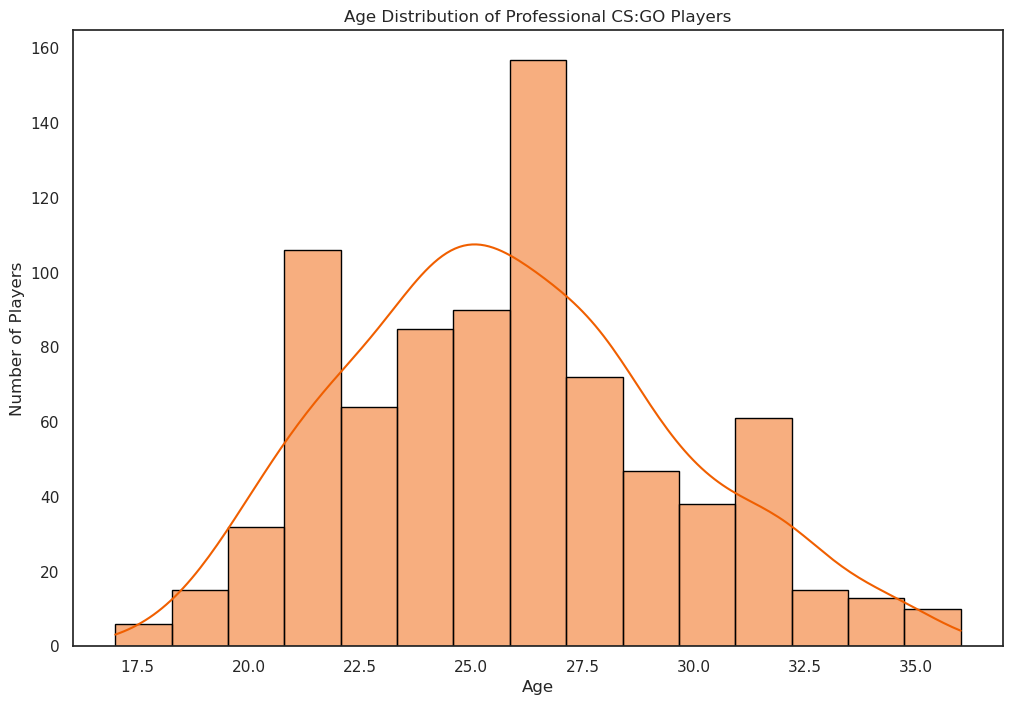

In [12]:
# Suppress specific seaborn and pandas future warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Color theme inspired by CS:GO
csgo_color = '#f05f00'

# Set style to white background without grid lines
sns.set(style="white")

# Histogram for Age Distribution
plt.figure(figsize=(12, 8))
# Add edgecolor to create an outline
ax = sns.histplot(csgo_data['age'], kde=True, bins=15,
                  color=csgo_color, edgecolor='black')
plt.title('Age Distribution of Professional CS:GO Players')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.show()

<center><b>Figure 1.</b> Age Distribution of Professional CS:GO Players</center>

In [13]:
# Summary Statistics for Age
age_stats = csgo_data['age'].describe()
age_mode = csgo_data['age'].mode()[0]
age_variance = np.var(csgo_data['age'])

# Displaying the summary statistics in a neat format
age_summary = pd.DataFrame({
    'Statistic': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'mode', 'variance'],
    'Value': [
        age_stats['count'], age_stats['mean'], age_stats['std'],
        age_stats['min'], age_stats['25%'], age_stats['50%'],
        age_stats['75%'], age_stats['max'], age_mode, age_variance
    ]
})

# Convert your DataFrame to an HTML table and center it
centered_html = f"<center>{age_summary.to_html()}</center>"

# Display the centered table
display(HTML(centered_html))

# Display the table caption centered
display(HTML("<center><b>Table 2.</b> Summary Statistics for Age</center>"))

,Statistic,Value
0,count,811.000000
1,mean,25.852035
2,std,3.697220
3,min,17.000000
4,25%,23.000000
5,50%,26.000000
6,75%,28.000000
7,max,36.000000
8,mode,25.000000
9,variance,13.652582


<div style="height: 2px; background-color:#f05f00; margin-top: 10px; margin-bottom: 10px;"></div>

### Where Professional CS:GO Players Come From

Below we present two visuals: a bar graph showing the countries with the most professional CS:GO players, and a map that paints a picture of these players' global distribution.

#### Insights at a Glance
- **Top Player Countries**: The bar graph lists the countries where many professional players come from. This could mean these places have a strong community and support for competitive gaming.
- **Key Esports Locales**: Some countries are leading the pack, possibly due to better gaming facilities or a welcoming attitude towards gaming as a career.
- **CS:GO's Worldwide Community**: The diversity of countries in the graph and on the map shows how widespread the love for CS:GO is, touching every corner of the globe.
- **Opportunities for Growth**: The map points out regions with fewer professionals, suggesting these could be the next new frontiers for CS:GO's expansion.

Together, these visuals tell us about the popularity of CS:GO around the world and where the future stars of the game might emerge from.

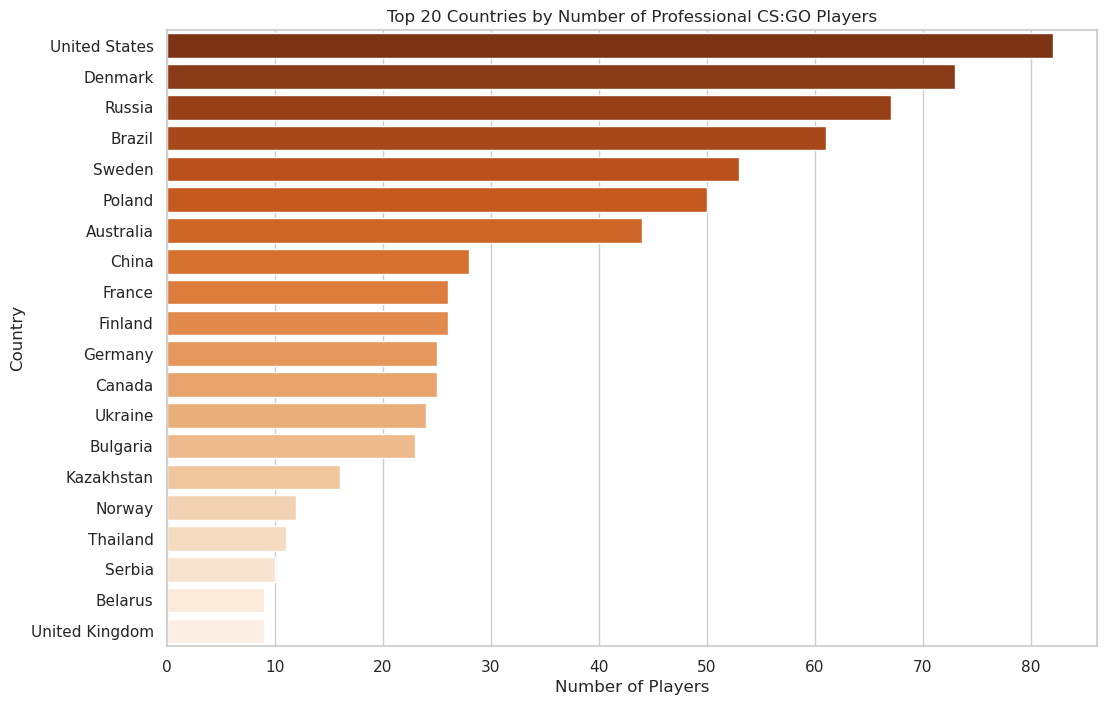

In [14]:
# Setting the style of the plots
sns.set(style="whitegrid")

# Defining a custom color palette with shades of orange and red
csgo_palette = sns.color_palette("Oranges_r", 20)  # 20 colors for the top 20 countries

# Plotting the distribution of professional players by country
plt.figure(figsize=(12, 8))
country_counts = csgo_data['country'].value_counts().head(20)  # Top 20 countries
sns.barplot(x=country_counts, y=country_counts.index, palette=csgo_palette)
plt.title('Top 20 Countries by Number of Professional CS:GO Players')
plt.xlabel('Number of Players')
plt.ylabel('Country')
plt.show()

<center><b>Figure 2.</b> Top 20 Countries by Number of Professional CS:GO Players</center>

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


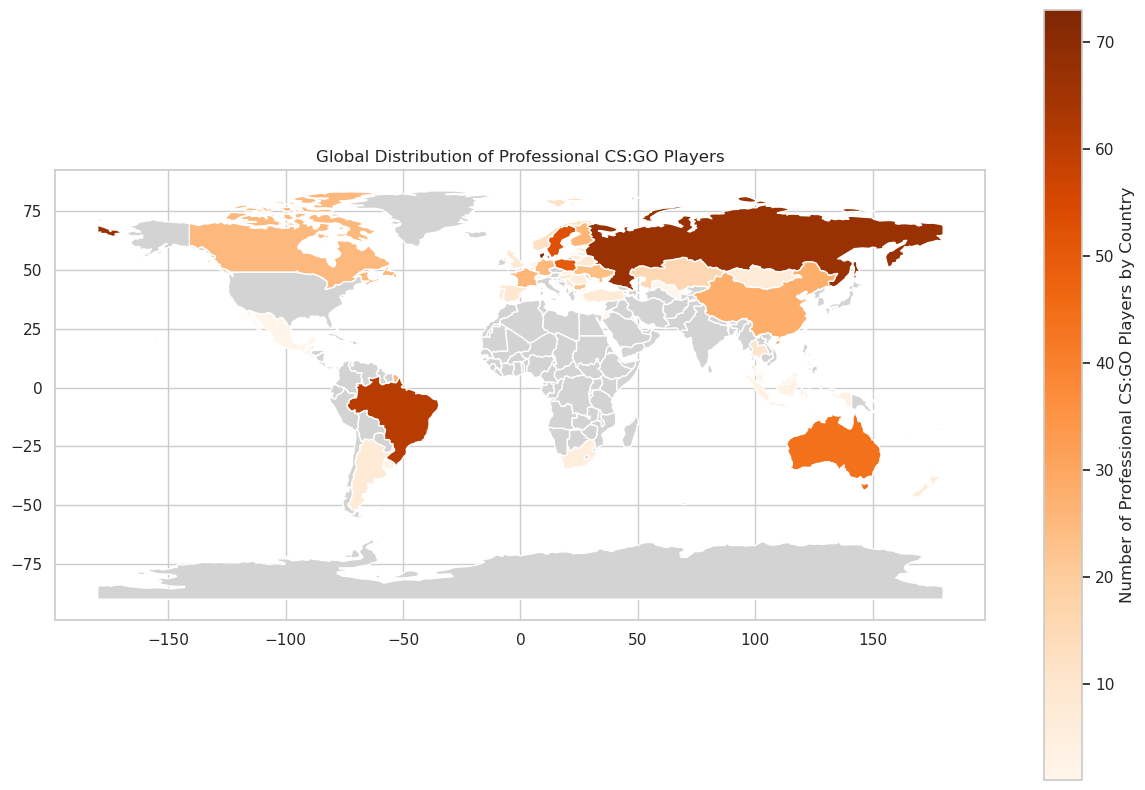

In [15]:
# Load the world geometries from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Counting the number of players per country in the dataset
player_counts = csgo_data['country'].value_counts().reset_index()
player_counts.columns = ['country', 'count']

# Merging player counts with world geometries
world = world.merge(player_counts, how='left', left_on='name', right_on='country')

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Defining a custom color palette with shades of orange and red
csgo_palette = sns.color_palette("Oranges", as_cmap=True)

# Plotting the global distribution of players
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='count', ax=ax, legend=True, cmap=csgo_palette, missing_kwds={'color': 'lightgrey'},
           legend_kwds={'label': 'Number of Professional CS:GO Players by Country'})
plt.title('Global Distribution of Professional CS:GO Players')
plt.show()

<center><b>Figure 3.</b> Global Distribution of Professional CS:GO Players</center>

<div style="height: 2px; background-color:#f05f00; margin-top: 10px; margin-bottom: 10px;"></div>

### CS:GO Tournament Prize Pool Trend Analysis

The accompanying graph traces the prize money trend in CS:GO tournaments, shedding light on the game's progression towards becoming a major e-sport with substantial economic influence.

Insights from the graph reveal:

- **Increasing Prize Pools**: A consistent rise in prize money is evident, reflecting the growing enthusiasm and investment in the realm of CS:GO e-sports.
- **Earning Potential**: The significant prize pools highlight the viability of professional CS:GO gaming as a lucrative career option, legitimizing it in the sporting world.
- **E-sports Maturation**: The amplified prize funds are indicative of e-sports maturing as a commercial industry, which continues to attract new players, teams, and business sponsorships.
- **Future Outlook**: The trend points to potential for continued growth within the CS:GO ecosystem and the broader e-sports landscape, hinting at a prosperous future.

This analysis emphasizes the importance of examining the professional scene of CS:GO. It reflects not only the game's widespread appeal but also its emergence as a professional sport with significant economic stakes.

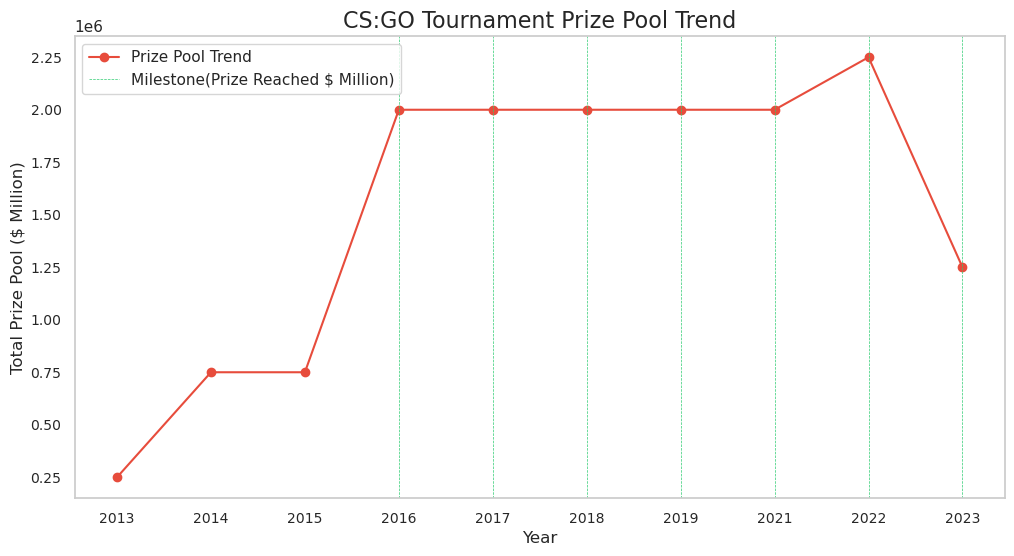

In [16]:
# Load the dataset for CS:GO Tournament Prize Pool Trend
file_path = 'prize_pool.csv'  # File path
df = pd.read_csv(file_path)

# Extracting year from the "Tournament" column
df['Year'] = df['Tournament'].str.extract(r'(\d{4})')

# Converting 'Prize Pool' to numerical values
df['Prize Pool'] = df['Prize Pool'].replace('[\$,]', '', regex=True).astype(float)

# Grouping by 'Year' and summing the 'Prize Pool' to get total prize pool per year
prize_pool_trend = df.groupby('Year')['Prize Pool'].sum().reset_index()

# Plotting the CS:GO Tournament Prize Pool Trend
plt.figure(figsize=(12, 6))
line, = plt.plot(prize_pool_trend['Year'], prize_pool_trend['Prize Pool'], marker='o', color='#e74c3c', label='Prize Pool Trend')

# Highlighting the year when the prize pool reached 1 million USD
million_dollar_years = prize_pool_trend[prize_pool_trend['Prize Pool'] >= 1000000]['Year']
for year in million_dollar_years:
    plt.axvline(x=year, color='#2ecc71', linestyle='--', lw=0.5)  # Using a green color for the milestone

# Adding customizations
plt.title('CS:GO Tournament Prize Pool Trend', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Prize Pool ($ Million)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)

# Adding a single legend covering both the Prize Pool Trend and Milestone Year
plt.legend(['Prize Pool Trend', 'Milestone(Prize Reached $ Million)'])

# Save the plot with a descriptive file name and high resolution
plt.savefig("prize_pool_trend.png", format='png', dpi=300)

# Show the plot
plt.show()

<center><b>Figure 4.</b> CS:GO Tournament Prize Pool Trend</center>

<h2 style="color:#f05f00; background-color:#1e1e1e; padding: 10px; text-align:left; border: 1px solid #f05f00;">Principal Component Analysis (PCA)</h2>

In this section, we'll perform Principal Component Analysis (PCA) on the CS:GO player dataset. PCA is a dimensionality reduction technique that helps uncover underlying patterns and reduce the dataset's complexity while retaining essential information.

#### Feature Selection

Before applying PCA, it's important to choose the relevant features from our dataset. The selected features should be numerical or appropriately encoded for PCA.

#### Data Standardization

Standardization of the data is crucial for the effective application of PCA. This process scales the features to have a mean of 0 and a standard deviation of 1.

#### Applying PCA

We will apply PCA to the standardized data. The process begins with extracting a few principal components, and the number can be adjusted based on the explained variance.

<div style="height: 2px; background-color:#f05f00; margin-top: 10px; margin-bottom: 10px;"></div>

#### Feature Selection for PCA

In preparation for Principal Component Analysis (PCA), it's essential to carefully select the columns (features) that will be included in the analysis. The choice of features should align with the goal of the analysis and the nature of the data. Here's a rationale for selecting the following columns for PCA in the CS:GO player dataset:

1. **Age**: Age is a relevant demographic factor that can influence a player's performance, experience, and career trajectory in professional CS:GO. Including age allows us to explore potential age-related patterns in player performance.

2. **Game Performance Metrics**:
   - **Total Kills**: The total number of kills made by a player is a fundamental performance metric that reflects their ability to eliminate opponents effectively.
   - **Total Deaths**: The total number of deaths provides context for a player's performance and the challenges they face.
   - **Damage Per Round**: Damage per round showcases a player's ability to inflict damage consistently in each round, indicating their impact on the game.
   - **Grenade Damage Per Round**: This metric focuses on damage inflicted through grenades, highlighting a player's skill in utilizing tactical tools.
   - **Kills Per Death**: The ratio of kills to deaths is a critical indicator of a player's performance and efficiency.
   - **Kills Per Round**: Kills per round measures a player's effectiveness in securing kills in each game round.
   - **Assists Per Round**: Assists per round reflect a player's teamwork and support skills, contributing to the team's success.
   - **Deaths Per Round**: This metric quantifies a player's rate of death in each round, shedding light on their survivability.
   - **Saved by Teammate Per Round**: The frequency at which a player is saved by teammates during rounds.
   - **Saved Teammates Per Round**: Indicates how often a player saves their teammates, demonstrating teamwork.
   - **Rounds with Kills**: The number of rounds in which a player secures kills, providing insights into their impact on rounds.
   - **Total Opening Kills**: Opening kills can have a significant influence on the outcome of rounds and matches.
   - **Total Opening Deaths**: Reflects how often a player dies at the start of rounds.
   - **Opening Kill Ratio**: The ratio of opening kills to opening deaths, an indicator of aggressive playstyle.
   - **Opening Kill Rating**: A performance metric related to opening kills.
   - **Team Win Percent After First Kill**: The team's win percentage after a player gets the first kill.
   - **First Kill in Won Rounds**: The frequency of a player's first kills in rounds their team wins.
   - **0-5 Kill Rounds**: Indicates the number of rounds with varying kill counts.

3. **Weapon-Specific Kills**:
   - **Rifle Kills**: Proficiency with rifles, a crucial aspect of CS:GO gameplay.
   - **Sniper Kills**: Skills with sniper rifles, which require precision.
   - **SMG Kills**: Effectiveness with SMGs, typically used for close-quarters combat.
   - **Pistol Kills**: Proficiency with pistols, important in eco rounds.
   - **Grenade Kills**: The ability to secure kills with grenades, demonstrating tactical skill.
   - **Other Kills**: Captures kills with other weapons, showcasing versatility.

4. **Rating**: The overall performance rating is a composite score that combines various in-game statistics to provide an overall performance assessment for a player.

5. **Maps Played**: While not part of the metrics explanation, "maps_played" provides information about the number of maps played by each player, reflecting their experience across different game scenarios.

6. **Rounds Played**: Similarly, "rounds_played" reflects the total number of rounds played by each player, offering insights into their overall game involvement.

These selected columns aim to provide a comprehensive view of a CS:GO player's performance, including demographic information, in-game statistics, and performance ratings. This diverse set of features allows us to explore patterns, correlations, and insights during PCA analysis.

In [17]:
# Select all numerical columns except 'player_id'
numerical_features = csgo_data.select_dtypes(include=['int64', 'float64']).columns.drop('player_id')

# Extracting the selected numerical features for PCA
selected_features = csgo_data[numerical_features]

# Display the first few rows of the selected features
selected_features.head()

,age,total_kills,total_deaths,headshot_percentage,damage_per_round,grenade_dmg_per_round,maps_played,rounds_played,kills_per_death,kills_per_round,...,3_kill_rounds,4_kill_rounds,5_kill_rounds,rifle_kills,sniper_kills,smg_kills,pistol_kills,grenade_kills,other_kills,rating
0,21,22622,16458,0.412,88.0,3.6,1020,26803,1.37,0.84,...,1474,369,71,8261,8552,1290,4262,260,49,1.32
1,24,35512,26413,0.413,86.4,2.4,1571,41491,1.34,0.86,...,2262,504,64,14717,13451,901,6057,199,254,1.25
2,21,18091,12492,0.278,78.6,3.9,884,23451,1.45,0.77,...,1075,221,30,3791,10580,550,3008,175,70,1.26
3,21,8738,6397,0.367,80.4,3.4,404,10913,1.37,0.80,...,518,112,8,2664,4348,181,1459,86,40,1.23
4,27,8482,6517,0.309,80.2,3.0,404,10701,1.30,0.79,...,524,114,14,2545,4412,264,1209,52,28,1.22


<div style="height: 2px; background-color:#f05f00; margin-top: 10px; margin-bottom: 10px;"></div>

#### Data Standardization

The standardization process involves the following steps:

1. **Calculate Mean and Standard Deviation**: Compute the mean (average) and standard deviation of each feature in the dataset.

2. **Standardize Each Feature**: For each feature, subtract its mean from each data point and then divide by its standard deviation. This process scales the feature to have a mean of 0 and a standard deviation of 1.

3. **Resulting Standardized Data**: The result is a new dataset where all features are standardized, making them directly comparable in terms of their contribution to the principal components.

Standardization ensures that PCA focuses on the underlying patterns and relationships in the data, rather than being influenced by differences in feature scales.

In [18]:
# Calculate Mean and Standard Deviation
feature_means = selected_features.mean()
feature_stddevs = selected_features.std()

# Standardize Each Feature
standardized_features = (selected_features - feature_means) / feature_stddevs

standardized_features

,age,total_kills,total_deaths,headshot_percentage,damage_per_round,grenade_dmg_per_round,maps_played,rounds_played,kills_per_death,kills_per_round,...,3_kill_rounds,4_kill_rounds,5_kill_rounds,rifle_kills,sniper_kills,smg_kills,pistol_kills,grenade_kills,other_kills,rating
0,-1.312347,0.958127,0.243005,-0.504221,3.127537,-0.398488,0.434565,0.432013,3.651424,3.397376,...,1.524179,2.337302,4.983556,-0.220393,1.917793,0.875213,1.223965,0.503624,-0.212534,3.931680
1,-0.500926,2.650607,1.646538,-0.492369,2.739303,-1.408934,1.790025,1.802225,3.323954,3.845533,...,3.362186,3.853456,4.337215,0.929311,3.377555,0.117639,2.581214,0.013272,2.497610,2.967735
2,-1.312347,0.363198,-0.316153,-2.092458,0.846660,-0.145877,0.100005,0.119311,4.524675,1.828825,...,0.593513,0.675148,1.197843,-1.016424,2.522079,-0.565930,0.275781,-0.179653,0.065090,3.105441
3,-1.312347,-0.864868,-1.175474,-1.037585,1.283424,-0.566896,-1.080796,-1.050332,3.651424,2.501061,...,-0.705688,-0.549006,-0.833515,-1.217124,0.665121,-1.284554,-0.895460,-0.895085,-0.331516,2.692322
4,0.310494,-0.898481,-1.158555,-1.725030,1.234894,-0.903711,-1.080796,-1.070109,2.887329,2.276982,...,-0.691693,-0.526544,-0.279508,-1.238316,0.684191,-1.122912,-1.084492,-1.168397,-0.490159,2.554615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,2.474282,-0.243285,0.302501,-0.421254,-2.089363,-1.240526,0.136905,0.098881,-2.570492,-2.428670,...,-0.556408,-0.627621,-0.925849,0.100691,-0.610495,0.037792,-0.292826,-0.637851,0.567459,-2.815935
807,0.310494,-1.125502,-0.880527,0.325455,-2.016569,2.127625,-0.955336,-0.951167,-2.570492,-2.876828,...,-1.216505,-1.222852,-1.202853,-0.842081,-0.594702,-0.495820,-1.162373,-0.155538,-0.688462,-2.953642
808,1.392388,0.938169,1.970106,0.384717,-2.598921,0.359346,1.807245,1.770694,-2.788805,-3.100906,...,0.238973,-0.447929,-0.371843,1.289039,-0.564905,1.311451,0.715092,1.645100,-0.199314,-3.091348
809,0.310494,-1.269803,-1.004033,0.289897,-2.113628,0.527753,-1.117696,-1.104346,-3.225431,-3.100906,...,-1.405437,-1.267775,-1.479856,-0.970123,-0.585465,-0.423763,-1.492801,-0.911163,0.355935,-2.678229


<div style="height: 2px; background-color:#f05f00; margin-top: 10px; margin-bottom: 10px;"></div>

#### Applying PCA

Let's now apply PCA to the standardized data. We'll start by extracting a few principal components and then increase the number based on the explained variance.

In [19]:
# Initialize PCA with 4 components for analysis
pca_analysis = PCA(n_components=4)

# Fit PCA to the standardized data for analysis
principal_components_analysis = pca_analysis.fit_transform(standardized_features)


In [20]:
# Initialize PCA with 10 components for variance explained plot
pca_plot = PCA(n_components=10)
pca_plot.fit(standardized_features)

# Calculate explained variance ratio for plotting
explained_variance_ratio_plot = pca_plot.explained_variance_ratio_


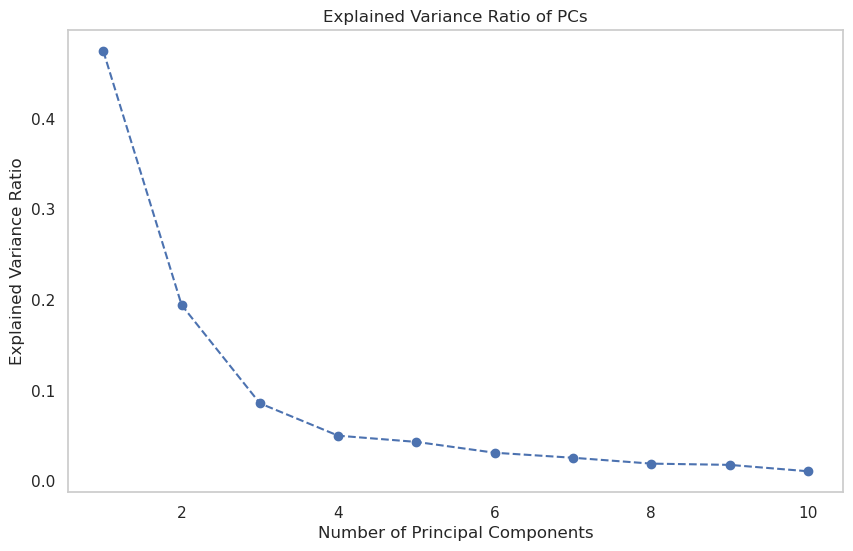

In [21]:
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(explained_variance_ratio_plot) + 1),
    explained_variance_ratio_plot,
    marker="o",
    linestyle="--",
)
plt.title("Explained Variance Ratio of PCs")
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.grid(False)
plt.show()


<center><b>Figure 5.</b> Explained Variance Ratio of PCs</center>

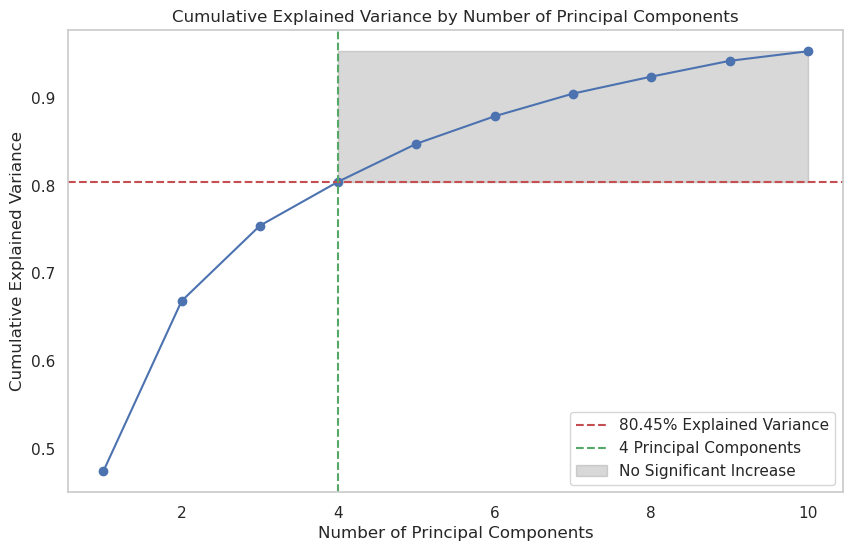

In [22]:
# Calculate cumulative explained variance using the explained_variance_ratio_plot
cumulative_variance_plot = explained_variance_ratio_plot.cumsum()

# Define the number of principal components you want to consider
n_components_analysis = 4  # Adjust this value as needed

# Calculate explained variance of the first n_components_analysis principal components
explained_variance_analysis = sum(explained_variance_ratio_plot[:n_components_analysis])

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(cumulative_variance_plot) + 1),
    cumulative_variance_plot,
    marker="o",
    linestyle="-",
    color="b",
)
plt.title("Cumulative Explained Variance by Number of Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.axhline(
    y=explained_variance_analysis,
    color="r",
    linestyle="--",
    label=f"{explained_variance_analysis:.2%} Explained Variance",
)
plt.axvline(
    x=n_components_analysis,
    color="g",
    linestyle="--",
    label=f"{n_components_analysis} Principal Components",
)
# Highlight the range where there is no significant increase
plt.fill_between(
    range(n_components_analysis, len(cumulative_variance_plot) + 1),
    cumulative_variance_plot[n_components_analysis - 1],
    cumulative_variance_plot[-1],
    alpha=0.3,
    color="gray",
    label="No Significant Increase",
)
plt.legend()
plt.grid(False)
plt.show()


<center><b>Figure 6.</b> Cumulative Explained Variance</center>

In [23]:
# Get the loadings for the first four principal components from PCA analysis
loadings = pca_analysis.components_

# Create a DataFrame for easier interpretation
loadings_df = pd.DataFrame(loadings, columns=standardized_features.columns, index=[f'PC{i+1}' for i in range(4)])

# Display the loadings for each PC
loadings_df


,age,total_kills,total_deaths,headshot_percentage,damage_per_round,grenade_dmg_per_round,maps_played,rounds_played,kills_per_death,kills_per_round,...,3_kill_rounds,4_kill_rounds,5_kill_rounds,rifle_kills,sniper_kills,smg_kills,pistol_kills,grenade_kills,other_kills,rating
PC1,0.049009,0.247641,0.242309,-0.017689,0.065295,0.041828,0.244171,0.244084,0.076085,0.073438,...,0.245919,0.238873,0.211728,0.204186,0.086334,0.182901,0.243601,0.209682,0.141173,0.045331
PC2,-0.117925,-0.014203,-0.074854,-0.217658,0.160359,-0.144940,-0.054114,-0.054214,0.334739,0.297265,...,0.019896,0.037753,0.058102,-0.148698,0.247167,-0.135194,-0.014985,-0.085514,-0.023093,0.317395
PC3,0.243015,0.008483,0.034381,-0.338405,-0.433974,-0.160367,0.045212,0.045525,-0.138791,-0.280414,...,-0.037039,-0.080535,-0.127873,-0.186505,0.318971,0.009018,0.022002,0.009762,0.063022,-0.260350
PC4,0.025562,-0.027617,0.006483,-0.006950,0.136442,-0.109281,-0.043743,-0.042659,-0.208322,0.101953,...,0.004639,0.039563,0.055654,-0.069216,0.064475,-0.005216,-0.020787,-0.113092,0.052125,-0.073817


#### Selection of Principal Components (PCs)

After standardizing the selected features, we applied PCA and carefully considered the number of Principal Components to retain.

#### Reason for Choosing 4 PCs

1. **Explained Variance**: The first 4 PCs explain a significant proportion of the 80.45% explained variance, capturing essential patterns in the dataset.

2. **Comprehensive Representation**: These components encompass various aspects of player performance, from general effectiveness to specific skills and tactical play.

3. **Interpretability and Dimensionality Reduction**: Retaining 4 PCs allows for a more interpretable feature space than the original high-dimensional data, simplifying subsequent analyses.

4. **Computational Efficiency**: This reduction in dimensionality also improves computational efficiency for future modeling and analysis.

In summary, selecting 4 PCs provides a balanced approach to dimensionality reduction, ensuring that we retain the most informative aspects of the data for our analysis.



<div style="height: 2px; background-color:#f05f00; margin-top: 10px; margin-bottom: 10px;"></div>

#### Identify the Top 4 Contributing Features for Each PCs

In [24]:
# Assuming pca_analysis.components_ contains the loadings for each principal component
loadings = pca_analysis.components_

# DataFrame for easier manipulation and visualization
loadings_df = pd.DataFrame(loadings, index=[
                           f'PC{i+1}' for i in range(loadings.shape[0])], columns=standardized_features.columns)

# Identifying the top 4 features for each of the first four PCs
top_features_per_pc = {}
for i in range(4):
    pc = f'PC{i+1}'
    loadings_pc = loadings_df.loc[pc].abs()  # Absolute value for magnitude
    top_features = loadings_pc.nlargest(4).index.tolist()  # Get top 4 features
    top_features_per_pc[pc] = top_features

top_features_per_pc

{'PC1': ['total_kills', '2_kill_rounds', 'rounds_with_kills', '3_kill_rounds'],
 'PC2': ['opening_kill_ratio',
  'kills_per_death',
  'opening_kill_rating',
  'rating'],
 'PC3': ['damage_per_round',
  'saved_teammates_per_round',
  'headshot_percentage',
  'sniper_kills'],
 'PC4': ['deaths_per_round',
  'first_kill_in_won_rounds',
  'opening_kill_rating',
  'saved_teammates_per_round']}

#### Top Features for Each Principal Component

| Principal Component | Top Features                       |
|---------------------|------------------------------------|
| PC1                 | Total Kills, 2-Kill Rounds, Rounds with Kills, 3-Kill Rounds |
| PC2                 | Opening Kill Ratio, Kills Per Death, Opening Kill Rating, Rating |
| PC3                 | Damage Per Round, Saved Teammates Per Round, Headshot Percentage, Sniper Kills |
| PC4                 | Deaths Per Round, First Kill in Won Rounds, Opening Kill Rating, Saved Teammates Per Round |

<center><b>Table 3.</b> Top Features for Each Principal Component</center><br>

This table lists the top four features that contribute the most to each of the first four principal components. These features represent the most significant aspects of player performance captured by each component in the PCA analysis.


#### Understanding Principal Components in CS:GO Player Analysis

#### PC1: The Eliminator
- **Top Features**: Total Kills, 2-Kill Rounds, Rounds with Kills, 3-Kill Rounds
- **Explanation**: PC1 captures a player's core combat efficiency and impact in matches. It reflects the frequency and effectiveness of eliminating opponents, emphasizing a player's consistent offensive contribution. Think of PC1 as a snapshot of a player's general performance level. It tells us how good a player is in terms of basic gameplay metrics like kills, deaths, and overall contributions to the team's success.

#### PC2: The Early-Bird
- **Top Features**: Opening Kill Ratio, Kills Per Death, Opening Kill Rating, Rating
- **Explanation**: PC2 focuses on tactical precision and effectiveness. It highlights skills in securing first kills and maintaining a high kill-to-death ratio, indicating tactically accurate players who make critical plays for team success. Imagine PC2 as a measure of a player's sharpshooting skills and smart play. It tells us how precise and tactical a player is, like their ability to land headshots or make impactful kills without wasting resources.

#### PC3: The Camper
- **Top Features**: Damage Per Round, Saved Teammates Per Round, Headshot Percentage, Sniper Kills
- **Explanation**: This component emphasizes strategic gameplay and support roles. It includes the ability to inflict significant damage, strategic positioning, and team support, highlighting players adept in both combat and tactical support. Think of PC3 as highlighting the 'team player' aspect. It's about how well a player supports their teammates, contributes to team strategies, and performs roles that are crucial for team success but not always in the spotlight.

#### PC4: The Frontliner
- **Top Features**: Deaths Per Round, First Kill in Won Rounds, Opening Kill Rating, Saved Teammates Per Round
- **Explanation**: PC4 represents a balance between risk-taking and rescue operations. It suggests versatility in gameplay, combining aggression with tactical rescues, indicative of players who are valuable assets in various situations. Consider PC4 as the 'special skills' indicator. It tells us about the unique talents or strategies a player brings to the table, like being particularly good in specific scenarios or having a unique approach to the game that sets them apart.

Each principal component gives us a different lens to view player abilities and roles in CS:GO. By understanding these components, we can appreciate the diverse skill sets players have and how they contribute to the team's overall performance in various ways.


<div style="height: 2px; background-color:#f05f00; margin-top: 10px; margin-bottom: 10px;"></div>

### Plotting Principal Components (PCs)

In this section, we visually explore the relationships between different pairs of Principal Components (PCs) derived from our PCA analysis. Each plot compares two PCs, providing insights into how various aspects of CS:GO players' performance are related to each other in the reduced-dimensional space created by PCA.

#### Key Aspects of the Plots:
- **Scatter Plots**: Each subplot is a scatter plot representing the distribution of our dataset across two principal components. These plots help us understand how players' data points are spread and potentially clustered in the context of the selected PCs.
- **Feature Arrows**: For each pair of PCs, we highlight the top contributing features using arrows. These arrows indicate the direction and magnitude of each feature's influence on the respective PCs.
- **Feature Labels**: Alongside each arrow, labels are provided to identify the top features contributing to the PCs. The magnitude of influence is also shown, giving a clear indication of the features' significance.

The combination of scatter plots and feature arrows offers a comprehensive view of the PCA results, revealing underlying patterns and relationships within the CS:GO player data. By examining these plots, we can discern which features are most influential in different aspects of player performance as captured by the PCA.

Let's dive into these visualizations to uncover deeper insights into the multidimensional nature of player performance in CS:GO.


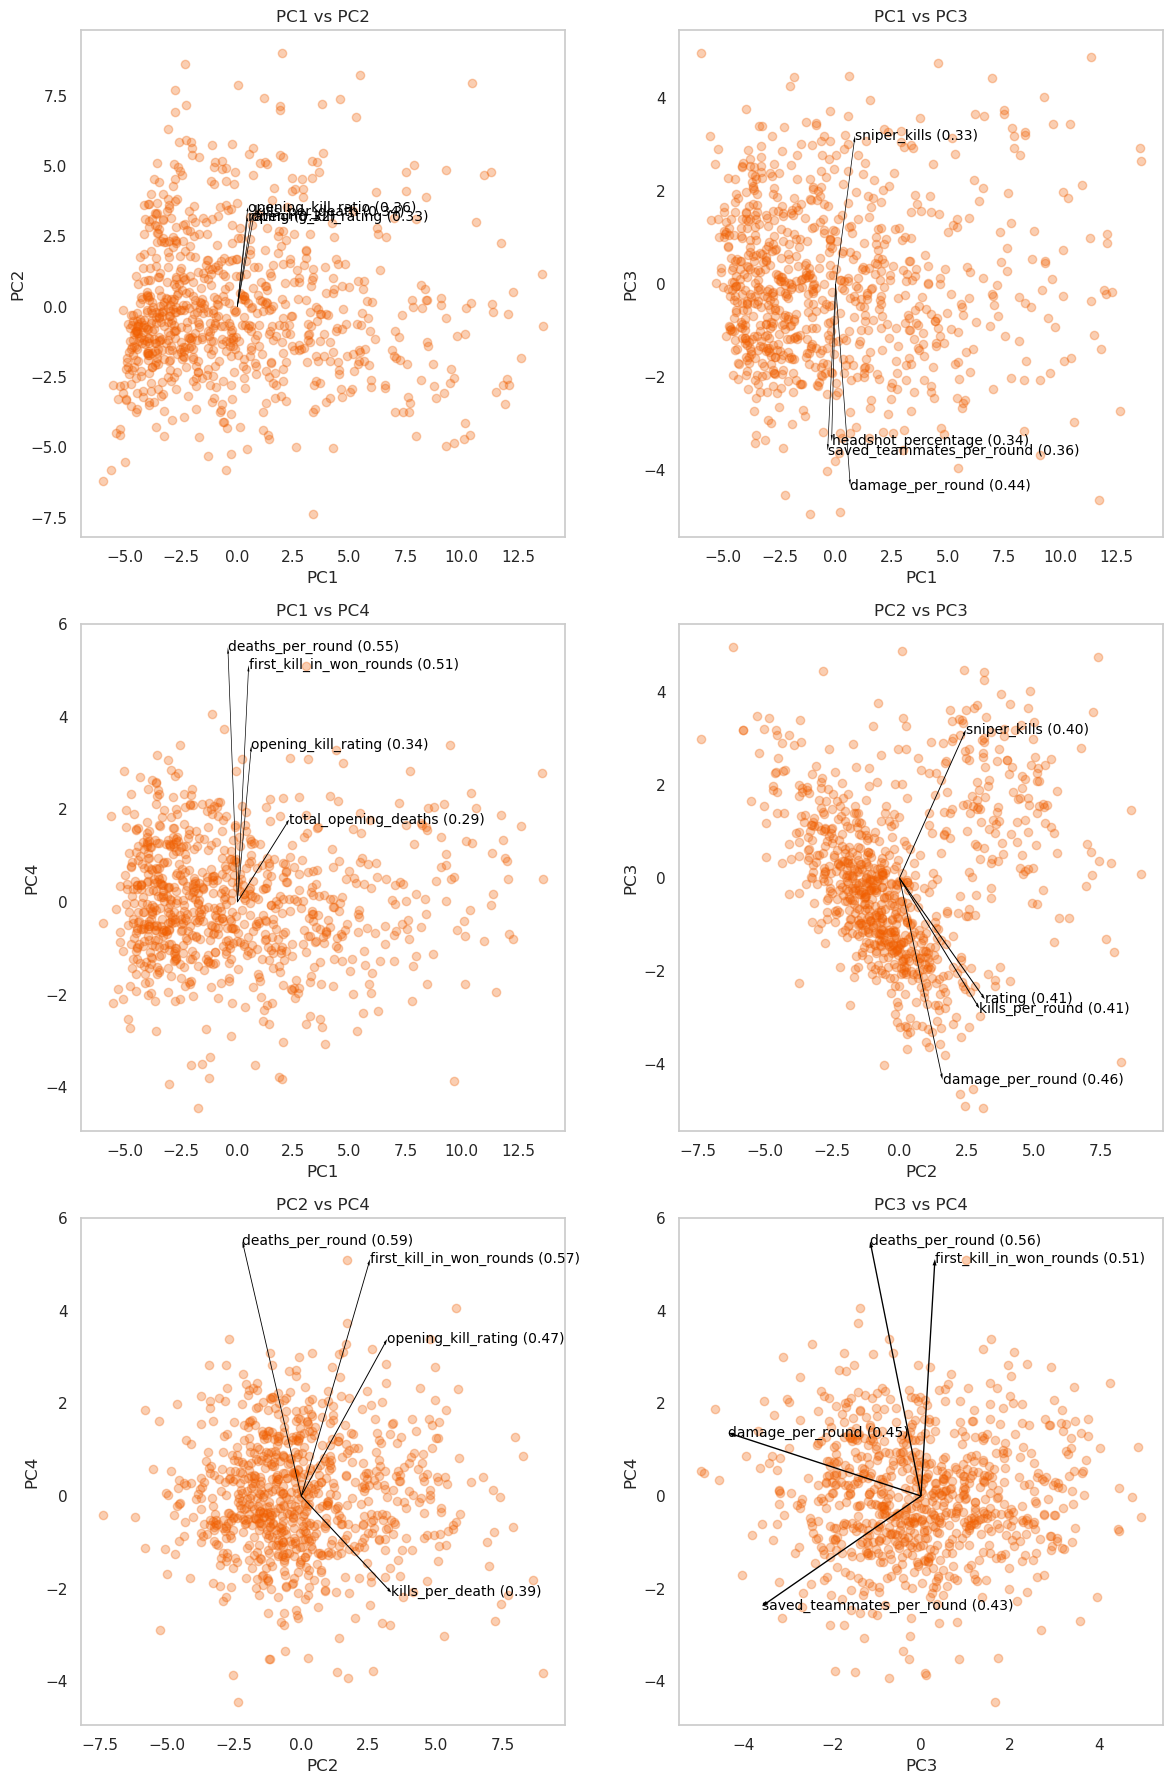

In [25]:
# Define a color for the theme
csgo_color = '#f05f00'

# Create a subplot layout to accommodate the six PC combinations
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))

# Define combinations of PCs for plotting
pc_combinations = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

# Plot each combination
for i, (pc_x, pc_y) in enumerate(pc_combinations):
    ax = axes[i // 2, i % 2]
    ax.scatter(principal_components_analysis[:, pc_x],
               principal_components_analysis[:, pc_y], alpha=0.3, color=csgo_color)
    ax.set_xlabel(f'PC{pc_x + 1}')
    ax.set_ylabel(f'PC{pc_y + 1}')
    ax.set_title(f'PC{pc_x + 1} vs PC{pc_y + 1}')
    ax.grid(False)

    # Pair pca_analysis.components_[pc1] and pca_analysis.components_[pc2]
    paired_components = list(
        zip(pca_analysis.components_[pc_x], pca_analysis.components_[pc_y]))

    # Calculate the magnitude of each pair
    magnitudes = [np.linalg.norm(pair) for pair in paired_components]

    # Sort based on magnitudes
    sorted_indices = np.argsort(magnitudes)[-4:]
    sorted_magnitudes = np.array(magnitudes)[sorted_indices]
    sorted_paired_components = np.array(paired_components)[sorted_indices]

    # Draw arrows for the top four features
    for magnitude, (component_pc1, component_pc2), feature_idx in zip(sorted_magnitudes, sorted_paired_components, sorted_indices):
        ax.arrow(0, 0, 10 * component_pc1, 10 * component_pc2,
                 width=0.03, ec="none", fc="black", length_includes_head=True)

        # Add text annotations near the arrows
        ax.text(10 * component_pc1, 10 * component_pc2, f"{standardized_features.columns[feature_idx]} ({magnitude:.2f})",
                ha='left', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

<center><b>Figure 5.</b> Relationships Between Principal Components in CS:GO Player Performance Analysis</center>

<div style="height: 2px; background-color:#f05f00; margin-top: 10px; margin-bottom: 10px;"></div>

### Interpretation of PCA Results for CS:GO Player Dataset

#### Principal Component Analysis (PCA) Overview

The PCA uncovers patterns in player performance, focusing on various aspects like overall efficiency, precision skills, and tactical play. Here's a non-technical breakdown of the unique combinations of principal components:

#### PC1 x PC2 (Overall Performance and Efficiency)
- **Highlights**: Rating, Opening Kill Rating, Kills Per Death, Opening Kill Ratio
- **Interpretation**: Measures a player's overall effectiveness, especially in initiating matches and balancing kills with survival. It's like gauging how well players start and maintain their performance throughout the game.

#### PC1 x PC3 (Precision and Tactical Support)
- **Highlights**: Sniper Kills, Headshot Percentage, Saved Teammates Per Round, Damage Per Round
- **Interpretation**: Focuses on players' sniper skills and headshot accuracy, combined with their ability to support teammates and cause significant damage in each round. This combination assesses both sharpshooting talents and team support contributions.

#### PC1 x PC4 (Engagement and Risk)
- **Highlights**: Total Opening Deaths, Opening Kill Rating, First Kill in Won Rounds, Deaths Per Round
- **Interpretation**: Reflects players' willingness to take the lead at the risk of early elimination, evaluating their boldness in achieving first kills and their overall survival in the game.

#### PC2 x PC3 (Sniping Expertise and Round Impact)
- **Highlights**: Sniper Kills, Kills Per Round, Rating, Damage Per Round
- **Interpretation**: Captures players’ proficiency with sniper rifles and their overall impact in each round, assessing long-range combat skills and contributions to team success in each round.

#### PC2 x PC4 (Survival and Impactful Play)
- **Highlights**: Kills Per Death, Opening Kill Rating, First Kill in Won Rounds, Deaths Per Round
- **Interpretation**: Showcases players' ability to stay alive while making significant plays, balancing survival skills with contributions to team victories.

#### PC3 x PC4 (Tactical Support and Game Influence)
- **Highlights**: Saved Teammates Per Round, Damage Per Round, First Kill in Won Rounds, Deaths Per Round
- **Interpretation**: Emphasizes the role in supporting teammates, influencing rounds won, and contributing damage, assessing how players help their team and make pivotal plays leading to victories.

<div style="height: 2px; background-color:#f05f00; margin-top: 10px; margin-bottom: 10px;"></div>

### Overall Insights

#### Holistic Player Performance
The PCA revealed multi-dimensional aspects of player performance. Beyond traditional metrics like kills/deaths, it's crucial to consider factors such as tactical play and support roles that significantly contribute to team success.

#### Balancing Team Skills
The analysis suggests the importance of a balanced team composition with players excelling in varied aspects, including aggressive play, defensive tactics, and precision shooting. A diverse skill set in a team enhances adaptability and success in different game scenarios.

#### Data-Driven Decision Making
Findings underscore the value of data-driven strategies in esports. Complex datasets, when analyzed effectively, empower teams with informed decisions regarding player recruitment, training, and in-game tactics, ultimately enhancing overall team performance.


<h2 style="color:#f05f00; background-color:#1e1e1e; padding: 10px; text-align:left; border: 1px solid #f05f00;">Recommendations</h2>

1. **Targeted Training**: 
   - Utilize PCA insights to identify specific skills for improvement.
   - Emphasize targeted training sessions focusing on identified areas like tactical grenade use or sniping proficiency.

2. **Strategic Team Formation**: 
   - Combine players with complementary skills to form balanced teams.
   - Align players strategically based on their strengths, as identified by the PCA (e.g., snipers, close-combat specialists).

3. **Match Preparation**: 
   - Apply PCA to analyze opponents' strengths and weaknesses.
   - Prepare tailored strategies to counter opponents' playstyles effectively.

4. **Player Scouting**: 
   - When scouting for new talent, use PCA insights to identify players who fill specific skill gaps.
   - Focus on recruiting players whose strengths complement the existing team composition.

5. **Data-Informed In-Game Decisions**: 
   - Make real-time decisions during matches based on PCA-derived insights.
   - Position players optimally in matches according to their PCA-identified strengths, especially in crucial game moments.

By leveraging the insights gained from PCA, esports teams can enhance their strategic approach and overall performance in CS:GO competitions.

<h2 style="color:#f05f00; background-color:#1e1e1e; padding: 10px; text-align:left; border: 1px solid #f05f00;">Limitations of the Study</h2>

This project provides an insightful analysis of CS:GO player performance using Principal Component Analysis (PCA), yet it's important to acknowledge certain limitations:
 
1. **Data Scope**: Our analysis is based on data from a specific source (e.g., HLTV.org). While this data is extensive, it might not fully capture all aspects of player performance, particularly the subtleties and complex dynamics of CS:GO gameplay.
 
2. **PCA Constraints**: PCA is a linear dimensionality reduction technique. It assumes linear relationships between features, which might not adequately represent the complex and possibly non-linear nature of CS:GO gameplay.
 
3. **Generalizability**: The findings are specific to the dataset and context of professional CS:GO play. Caution should be exercised when extending these insights to other contexts or games.
 
4. **Feature Selection**: The selection of features for PCA was based on data availability and presumed relevance to performance analysis. However, other significant variables not included in our dataset might also impact performance.
 
5. **Temporal Dynamics**: Our study does not account for changes over time, such as player development, evolving strategies, or game updates, all of which can significantly influence performance metrics.
 
6. **External Validation**: The absence of a comparative analysis with established rankings, such as HLTV's, limits external validation of our PCA model. Future work that includes such comparisons could provide a more comprehensive validation of the model's effectiveness.
 
Understanding these limitations is essential for placing the study's findings in context and guiding future research in esports data analytics.

<h2 style="color:#f05f00; background-color:#1e1e1e; padding: 10px; text-align:left; border: 1px solid #f05f00;">Further Studies</h2>

Building on this study's findings and considering its limitations, several promising directions for future research are identified. These avenues aim to deepen our understanding and address areas not fully explored in this project:
 
1. **Comparative Ranking Analysis**: A future study could involve a detailed comparison of PCA-derived rankings with established esports rankings, such as those from HLTV. This analysis would serve as an external validation of the PCA model and could reveal new insights into player performance metrics.
 
2. **Exploring Non-linear Dimensionality Reduction**: Investigating non-linear techniques like t-SNE or UMAP might uncover complex patterns in CS:GO player data that linear PCA might miss.
 
3. **Longitudinal Analysis**: Conducting a study over time to observe changes in player performance and strategic evolution would provide valuable insights into development trends within esports.
 
4. **Cross-Game Analysis**: Extending the methodology to other esports titles could help determine if the insights from CS:GO are applicable across different games, thus contributing to a broader understanding of esports performance.
 
5. **Incorporating Additional Data Sources**: Enriching the analysis with qualitative data, such as player interviews or expert commentary, alongside quantitative metrics, could offer a more nuanced perspective on what contributes to esports success.
 
6. **Machine Learning Predictive Models**: Applying machine learning techniques to predict match outcomes, player performance, or team success based on identified PCA components could be a practical extension of this research.
 
These research directions could significantly enhance our understanding of esports, offering valuable insights for players, teams, and the broader gaming community.

<h2 style="color:#f05f00; background-color:#1e1e1e; padding: 10px; text-align:left; border: 1px solid #f05f00;">Conclusion</h2>

The application of Principal Component Analysis (PCA) to CS:GO player data in this study has provided significant insights into the complex dynamics of esports performance. By distilling multifaceted player data into principal components, we have uncovered key factors that contribute to player effectiveness and team success in CS:GO.

Through this analysis, we have demonstrated the potential of data-driven approaches in enhancing strategic planning and gameplay within competitive esports. The findings offer not only a deeper understanding of player performance metrics but also highlight the importance of a balanced team composition and the need for targeted skill development.

While acknowledging the limitations of this study, we have identified several promising directions for future research, which could further enrich our understanding of esports analytics. These include exploring non-linear dimensionality reduction techniques, longitudinal studies, cross-game analyses, and the integration of machine learning models.

In conclusion, this project underscores the transformative impact of advanced data analysis techniques in the realm of professional esports. By bridging the gap between complex data and actionable insights, we pave the way for more sophisticated and informed decision-making in CS:GO competitive play. The methodologies and findings of this study have the potential to significantly enhance team strategies and player performance, contributing to the evolving landscape of esports competition and analysis.
